In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(grid)

# Custom package
library(rutils)

-- Attaching packages -------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ----------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 10
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320
ht <- 5.1
wd <- 5.1

In [4]:
tom_figs <- list()

for (idx in 1:3) {
    tom_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_tomplots.RData"))
}
tom_figs <- Reduce(c, tom_figs)

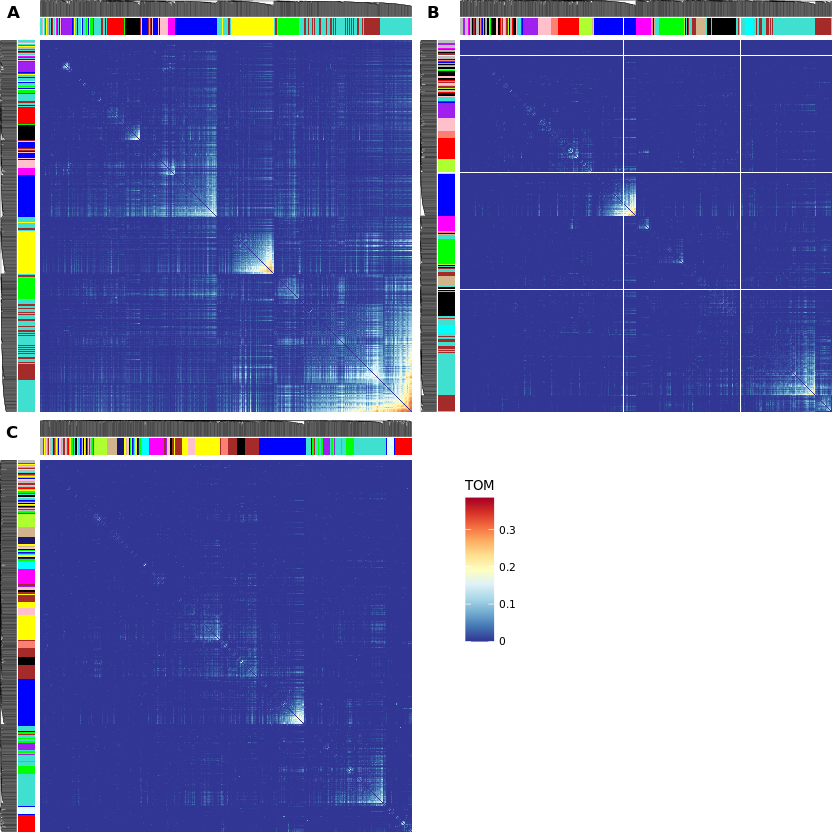

In [5]:
figS1 <- plot_grid(
    CESC_tomplot,
    UCEC_tomplot,
    UCS_tomplot,
    plot_grid(get_legend(CESC_tom_tileplot + theme(legend.position = "right")), NULL, NULL, NULL, ncol = 2, rel_widths = c(0.5, 1), rel_heights = c(1, 0.5)),
    nrow = 2,
    labels = c("A", "B", "C"),
    label_fontfamily = family,
    label_size = label_text_size
)
figS1

In [6]:
ggsave(filename = paste0(dirs$figures_dir, "/paneled/figureS1.png"), plot = figS1, dpi = dpi, height = ht, width = wd)